# Medical appointments No shows
#### by: Reem Mandour

<img src="MedicalAppointment.jpg" alt="MedicalAppointment Page" title="MedicalAppointment Kaggle page" /><br>

Import necessary packages. Most importantly <strong>% Matplotlib inline</strong> to display visuals in same page, and <strong>sns.set_style</strong> to control visuals' background theme.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<strong>Note:</strong> This code is commented for optimization. when uncommented, cells take time to execute all queried rows.

In [2]:
# Display columns and rows fully with no collapse
#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_columns',None)

## Question Posed:

* Why do 30% of the patients not show up for their scheduled appointment according to given data? <br>
* How do factors of appointments differ and what can we infer from them?

## Gather Data

CSV file is downloaded from udacity servers. Original source on <a href="https://www.kaggle.com/joniarroba/noshowappointments"> Kaggle</a>

In [3]:
# Load CSV file using pandas function read_csv
df_medical = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
df_medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Assess Data

1) Columns should always have meaningful names for the following reasons: clarity,  easy code access with .operator, and ,although not impacting syntax, abiding to pep-8 standard. For these reasons,  Rename PatientId to patient_id, AppointmentID to appointment_id, Gender to gender, ScheduledDay to scheduled_date, AppointmentDay to appointment_date, Age to age, Neibourhood to neibourhood, Scholarship to scholarship, Hipertension to hypertension, Diabeted to diabetes, Alcoholism to acoholism, Handcap, to handicap, No-show to no_show.py<br>
2) Patient id is loaded incorrectly with float datatype. It must be string to preserve accuracy and prevent having it in statistical calculation like describe() function. It is loaded with datatype for the reason in [to be added]<br>
3) Appointment Id is unique , but has a great hidden error. Two or more appointments for the same person on the same day has two or more unique Ids. With this scarce dataset, they are considered the same unless other variable or columns are added. This is to be explained in detail later in limitations section .<br>
4) Scheduled day and appointment day must be datetime. Scheduled day has timestamp whereas appointment day has no timestamp so we cannot take timestamp in our measurments. Truncate Timestamp for consistency of data <br>
5) Age variable or column has unrealistic data. It is not logical to have people with 115 years old age. These number go far beyond the human's life span. There are proposed reasinons for this which will be discussed in limitations section<br>
6) Scholarship, Hipertension, Diabetes, Alcoholism, Handicap are boolean variables. Instead of having 0 or 1, it is better ti give them precise datatypes and equivilant data to 0 or 1.<br>
   Note: Handicap column has values 2, 3, 4 , although it is boolean according to kaggle. Any value other than zero is considered True. Values with 2, 3, 4 also have proposed reasons explained later in limitations section<br>
7) No-show variable changed to boolean from No/yes for consistency of data. To have a good and consistent dataset structure as well as semantics. All variables should have their close precise datatypes. [[4]](#ref_links4) <br>
8) When AppointmentID is removed, data has a lot of duplicate patients with same appointments on the same day.<br>
9)  Add new column or variable called days_diff, which states the difference between appointment day and scheduled day. [[5]](#ref_links5) <br>
10) There are rows with scheduled date greater than appointment date, which is impossibe to happen. [[6]](#ref_links6)<br>
11) Investigating further in dataset shows that whenever an SMS is received, a new row is inserted. We have three cases in this case:[[3]](#ref_links3)
    <ul>
    <li>
      A Patient scheduled an appointment and SMS is received, but did not show so no-show = True. In this case,  original     column has a no-show row set to true and a new column is recorded.
    </li>
    <li>
      A Patient scheduled an appointment and SMS is received, but patient showed so no-show = False. In this case,  original column has a no-show row set to False and a new column is recorded.
    </li>
    <li>
      A Patient scheduled an appointment and SMS is not received, but patient showed so no-show = True. In this case,  original column has a no-show row set to False and a new column is recorded with no show = True.
    </li>
    </ul>
12) Overlapping dates: it is illogical to have a row of patient scheduling on 10th of july and appointment on 12th of july, and another row saying scheduled day is 12th of july and appointment 12th of july. until further columns are added(discussed in limitations section), this is considered duplicate added too on visit day. [[3]](#ref_links3)

In [5]:
# Assess Issue 1, 2
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Asses Issue 2
# patient id is float , should be loaded as int. Will convert to string to preserve accuracy
df_medical.PatientId.dtype

dtype('float64')

In [7]:
# More than one appointment for the same patient
df_medical.PatientId.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

In [8]:
# we have more than one reservation per patient
df_medical.PatientId.duplicated().sum()

48228

In [9]:
# Assess Issue 3
# Data with Appointment Id is unique, so no issue.
df_medical.AppointmentID.duplicated().sum()

0

In [10]:
# # Assess Issue 4
# Data without Appointment Id has duplicates, that is to be studied further and dropped. Discussed in detail in cleaning section
df_medical.duplicated(subset=['PatientId', 'Gender', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']).sum()

28700

In [11]:
# patientid and Appointment id must not have any statistical calculation; They must be converted to string
# Also, other variables except age are boolean variables, so statistical info should be interpreted from them
df_medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
# Asses Issue 5
# Age has illogical data
df_medical.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [13]:
# Assess Issue 5
# querying one of illogical aga data
df_medical.query('Age == 115')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [14]:
# Assess Issue 6
# Must be changed to boolean
df_medical.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [15]:
# Assess Issue 6
# Must be changed to boolean
df_medical.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [16]:
# Assess Issue 6
# Must be changed to boolean
df_medical.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [17]:
# Assess Issue 6
# Must be changed to boolean
df_medical.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [18]:
# Assess Issue 6
# Must be changed to boolean
df_medical.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [19]:
# Assess Issue 7
# Change datatype to boolean and No/yes to False/True
df_medical['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [20]:
# Assess Issue 10
# Scheduled date greater than appointment date
df_medical.query('AppointmentID == 5686628')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
71533,9.982316e+14,5686628,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes


In [21]:
# Assess Issue 11
# check Appointment ID 5532909 has SMS_received =0 and Appointment ID 5532908 is same appoint but when SMS_received =1
df_medical.query('PatientId == 22462135793684.0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
287,2.246214e+13,5532909,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,0,Yes
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
56945,2.246214e+13,5688305,M,2016-05-12T07:14:55Z,2016-05-12T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,0,No


In [22]:
# Assess Issue 11
# case 1 : SMS is received, and patient showed on appointment date. 
df_medical.query('PatientId == 398725181975621.0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
416,3.987252e+14,5496971,F,2016-03-21T15:22:03Z,2016-04-29T00:00:00Z,32,ITARARÉ,0,0,0,0,0,1,No
417,3.987252e+14,5496974,F,2016-03-21T15:22:17Z,2016-04-29T00:00:00Z,32,ITARARÉ,0,0,0,0,0,0,No


In [23]:
# Assess Issue 11
# case 2 : SMS is received, and patient showed on appointment date. 
df_medical.query('PatientId == 871283776126154.0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
2477,8.712838e+14,5605719,M,2016-04-20T09:22:46Z,2016-04-29T00:00:00Z,16,ROMÃO,0,0,0,0,0,1,No
18666,8.712838e+14,5638382,M,2016-04-29T07:59:00Z,2016-05-10T00:00:00Z,16,ROMÃO,0,0,0,0,0,1,Yes
18668,8.712838e+14,5638383,M,2016-04-29T07:59:00Z,2016-05-10T00:00:00Z,16,ROMÃO,0,0,0,0,0,0,Yes
18776,8.712838e+14,5683204,M,2016-05-11T07:19:36Z,2016-05-11T00:00:00Z,16,ROMÃO,0,0,0,0,0,0,No
18838,8.712838e+14,5686621,M,2016-05-11T13:48:54Z,2016-05-20T00:00:00Z,16,ROMÃO,0,0,0,0,0,0,No
105354,8.712838e+14,5767796,M,2016-06-03T07:06:15Z,2016-06-03T00:00:00Z,16,ROMÃO,0,0,0,0,0,0,No
105373,8.712838e+14,5722730,M,2016-05-20T07:36:01Z,2016-06-02T00:00:00Z,16,ROMÃO,0,0,0,0,0,0,Yes
105375,8.712838e+14,5722729,M,2016-05-20T07:36:01Z,2016-06-02T00:00:00Z,16,ROMÃO,0,0,0,0,0,1,Yes


In [24]:
# Assess Issue 11
# case 3 : SMS is not received, and patient showed on appointment date. 
df_medical.query('PatientId == 7582519769766.0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
109580,7.582520e+12,5772440,M,2016-06-03T15:25:26Z,2016-06-07T00:00:00Z,52,COMDUSA,0,0,1,0,0,0,No
109585,7.582520e+12,5772435,M,2016-06-03T15:24:36Z,2016-06-07T00:00:00Z,52,COMDUSA,0,0,1,0,0,1,Yes


## Clean Data

Quality Issue 1: rename all dataset columns. <br>
Quality Issue 2: Patient Id must be converted from float to int, to remove trailing zeros, then to string to preserve accuracy.<br>
Quality Issue 3: Appointment Id is dropped due to inaccuracy of appointment id generation numbers.<br>
Quality Issue 4: convert Scheduled day and Appointment day to datetime, and truncate timestamp.<br>
Quality Issue 5: Age contains unrealistic data which prevents us from interpreting any further information about no shows people, so column is dropped.<br>
Quality Issue 6: Scholarship, Hypertension, Diabetes, Alcoholism, Handicap are converted to boolean variables.<br>
Quality Issue 7: No show converted to boolean for consistency of dataset structure.<br>
Quality Issue 8: drop duplicates in dataset to preserve unique data only.<br>
Quality Issue 9: Add days_diff column, to compute difference in days between scheduled and appointment dates.<br>
Quality Issue 10: drop data which has scheduled date greater than appointment date.<br>
Quality Issue 11: drop rows with duplicate scheduled and appointment dates having SMS_received = 0.<br>
Quality Issue 12: overlapping dates resolved but dropping rows with days_diff=0. These patients do have more than one row duplicated on patient_id and appointment date. So, we need the row with most accurate info.

### Make a copy of original data

In [25]:
df_medical_copy = df_medical.copy()

### Define: 
Quality Issue 1: rename all dataset columns.

### Code:

In [26]:
df_medical_copy.rename(columns={'PatientId': 'patient_id', 
                           'AppointmentID':'appointment_id', 
                           'Gender':'gender',
                           'ScheduledDay': 'scheduled_date',
                           'AppointmentDay': 'appointment_date',
                           'Age': 'age',
                           'Neighbourhood':'neighbourhood',
                           'Scholarship':'scholarship',
                           'Hipertension':'hypertension',          
                           'Diabetes':'diabetes',
                           'Alcoholism': 'alcoholism',
                           'Handcap':'handicap',
                           'No-show':'no_show'},inplace=True)

### Test:

In [27]:
df_medical_copy.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_date',
       'appointment_date', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'SMS_received',
       'no_show'],
      dtype='object')

### Define:
Quality 2 Issue: Patient Id must be converted from float to int, to remove trailing zeros, then to string to preserve accuracy

### Code:

In [28]:
# convert to int64
df_medical_copy.patient_id = df_medical_copy.patient_id.astype(np.int64)
# convert from int64 to string
df_medical_copy.patient_id = df_medical_copy.patient_id.astype(str)

### Test:

In [29]:
df_medical_copy.patient_id.dtype.name

'object'

### Define:
Quality Issue 3: Appointment Id is dropped due to inaccuracy of appointment id generation numbers.

### Code:

In [30]:
df_medical_copy.drop(columns={'appointment_id'}, inplace=True)

### Test:

In [31]:
df_medical_copy.columns

Index(['patient_id', 'gender', 'scheduled_date', 'appointment_date', 'age',
       'neighbourhood', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'SMS_received', 'no_show'],
      dtype='object')

### Define:
Quality Issue 4a: convert Scheduled day to datetime  [[2]](#ref_links2)

### Code:

In [32]:
# convert string to date to get data in accurate format
df_medical_copy.scheduled_date = pd.to_datetime(df_medical_copy.scheduled_date)
# Truncate timestamp; when timestamp is truncated, column datatype automatically changes to object from datetime
df_medical_copy.scheduled_date = df_medical_copy.scheduled_date.dt.date
# restore datetime datatype 
df_medical_copy.scheduled_date = pd.to_datetime(df_medical_copy.scheduled_date)

### Test:

In [33]:
df_medical_copy.scheduled_date.dtype.name

'datetime64[ns]'

In [34]:
df_medical_copy.scheduled_date.to_frame()

,scheduled_date
0,2016-04-29
1,2016-04-29
2,2016-04-29
3,2016-04-29
4,2016-04-29
5,2016-04-27
6,2016-04-27
7,2016-04-27
8,2016-04-29
9,2016-04-27


### Define:
Quality Issue 4b: convert appointment day to datetime  [[2]](#ref_links2)

### Code:

In [35]:
# appointment date in data has no timestamp.Column just has day which is converted easily to datetime
df_medical_copy.appointment_date = pd.to_datetime(df_medical_copy.appointment_date)

### Test:

In [36]:
df_medical_copy.appointment_date.dtype.name

'datetime64[ns]'

In [37]:
df_medical_copy.appointment_date.to_frame()

,appointment_date
0,2016-04-29
1,2016-04-29
2,2016-04-29
3,2016-04-29
4,2016-04-29
5,2016-04-29
6,2016-04-29
7,2016-04-29
8,2016-04-29
9,2016-04-29


### Define: 
Quality Issue 5: Age contains unrealistic data which prevents us from interpreting any further information about no shows people, so column is dropped.

### Code:

In [38]:
df_medical_copy.drop(columns={'age'}, inplace=True)

### Test:

In [39]:
df_medical_copy.columns

Index(['patient_id', 'gender', 'scheduled_date', 'appointment_date',
       'neighbourhood', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'SMS_received', 'no_show'],
      dtype='object')

### Define:
Quality Issue 6: Scholarship, Hypertension, Diabetes, Alcoholism, Handicap are converted to boolean variables.

### Code:

In [40]:
#1 convert all variables or columns to bool
df_medical_copy.scholarship = df_medical_copy.scholarship.astype(bool)
df_medical_copy.hypertension = df_medical_copy.hypertension.astype(bool)
df_medical_copy.diabetes = df_medical_copy.diabetes.astype(bool)
df_medical_copy.alcoholism = df_medical_copy.alcoholism.astype(bool)
df_medical_copy.handicap = df_medical_copy.handicap.astype(bool)

### Test:

In [41]:
df_medical_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
patient_id          110527 non-null object
gender              110527 non-null object
scheduled_date      110527 non-null datetime64[ns]
appointment_date    110527 non-null datetime64[ns]
neighbourhood       110527 non-null object
scholarship         110527 non-null bool
hypertension        110527 non-null bool
diabetes            110527 non-null bool
alcoholism          110527 non-null bool
handicap            110527 non-null bool
SMS_received        110527 non-null int64
no_show             110527 non-null object
dtypes: bool(5), datetime64[ns](2), int64(1), object(4)
memory usage: 6.4+ MB


<em>Scholarship:</em>

In [42]:
# Original data before cleaning
df_medical.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [43]:
#Data after cleaning
df_medical_copy.scholarship.value_counts()

False    99666
True     10861
Name: scholarship, dtype: int64

<em>Hypertension:</em>

In [44]:
# Original data before cleaning
df_medical.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [45]:
#Data after cleaning
df_medical_copy.hypertension.value_counts()

False    88726
True     21801
Name: hypertension, dtype: int64

<em>Diabetes:</em>

In [46]:
# Original data before cleaning
df_medical.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [47]:
#Data after cleaning
df_medical_copy.diabetes.value_counts()

False    102584
True       7943
Name: diabetes, dtype: int64

<em>Alcoholism:</em>

In [48]:
# Original data before cleaning
df_medical.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [49]:
#Data after cleaning
df_medical_copy.alcoholism.value_counts()

False    107167
True       3360
Name: alcoholism, dtype: int64

<em>Handicap:</em>

In [50]:
# Original data before cleaning
df_medical.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [51]:
#Data after cleaning
df_medical_copy.handicap.value_counts()

False    108286
True       2241
Name: handicap, dtype: int64

### Define:
Quality Issue 7: No show converted to boolean for consistency of dataset structure.

In [52]:
# use pandas replace function
df_medical_copy.no_show = df_medical_copy.no_show.replace({'Yes': True, 'No': False})

In [53]:
# convert datatype to boolean
df_medical_copy.no_show = df_medical_copy.no_show.astype(bool)

### Test:

In [54]:
# datatype in original dataset
df_medical['No-show'].dtype.name

'object'

In [55]:
# datatype in copied dataset
df_medical_copy.no_show.dtype.name

'bool'

In [56]:
# values in original dataset
df_medical['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [57]:
#equivilant False/True values in copied dataset
df_medical_copy.no_show.value_counts()

False    88208
True     22319
Name: no_show, dtype: int64

### Define:
Quality Issue 8: Drop duplicates in dataset to preserve unique data only.<br>
<strong>Reminder:</strong> In Assess section, The reason behind dropping appointment id is stated and resolved in <em>quality 3</em>. Now comes the turn to drop duplicate rows for patients, which are revealed when appointment_id column is dropped.

In [58]:
df_medical_copy.duplicated().sum()

4222

### Code:

In [59]:
df_medical_copy.drop_duplicates(inplace=True)

In [60]:
df_medical_copy.reset_index(drop=True, inplace=True)

### Test:

In [61]:
# original data with no columns dropped
df_medical.shape

(110527, 14)

In [62]:
# copied data with columns dropped
df_medical_copy.shape

(106305, 12)

### Define
Quality Issue 9: Add days_diff column, to compute difference in days between scheduled and appointment dates.

### Code:

In [63]:
# elapsed time
df_medical_copy['days_diff'] = df_medical_copy['appointment_date'] - df_medical_copy['scheduled_date']
df_medical_copy['days_diff']=df_medical_copy['days_diff']/np.timedelta64(1,'D')

In [64]:
# convert column datatype from float64 to int64
df_medical_copy['days_diff'] = df_medical_copy['days_diff'].astype(np.int64)

### Test:

In [65]:
df_medical_copy['days_diff'].value_counts()

 0      35564
 2       6641
 4       5235
 1       5110
 7       4804
 6       3990
 5       3243
 14      2860
 3       2686
 8       2273
 21      1839
 28      1670
 13      1657
 9       1580
 15      1470
 10      1359
 20      1158
 22      1138
 16      1131
 12      1093
 17      1087
 29      1069
 19      1015
 18       997
 27       995
 11       960
 35       952
 23       814
 34       795
 26       721
        ...  
 98         5
 112        5
 103        5
 109        5
 108        5
 102        4
-1          4
 105        4
 96         4
 119        4
 122        3
 92         3
 115        2
 93         2
 110        2
 107        2
 97         2
 94         2
 123        1
 101        1
 126        1
 125        1
 139        1
 151        1
 132        1
 117        1
 146        1
 82         1
-6          1
 127        1
Name: days_diff, Length: 131, dtype: int64

### Define:
Quality Issue 10: drop data which has scheduled date greater than appointment date.

### Code:

In [66]:
#drop days_diff < 0 ; it is not logic to have appointment date after scheduled date
df_medical_copy.query('days_diff < 0')

,patient_id,gender,scheduled_date,appointment_date,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show,days_diff
26031,7839272661752,M,2016-05-10,2016-05-09,RESISTÊNCIA,False,False,False,False,True,0,True,-1
53223,7896293967868,F,2016-05-18,2016-05-17,SANTO ANTÔNIO,False,False,False,False,True,0,True,-1
61770,24252258389979,F,2016-05-05,2016-05-04,CONSOLAÇÃO,False,False,False,False,False,0,True,-1
68627,998231581612122,F,2016-05-11,2016-05-05,SANTO ANTÔNIO,False,False,False,False,False,0,True,-6
69431,3787481966821,M,2016-05-04,2016-05-03,TABUAZEIRO,False,False,False,False,False,0,True,-1


In [67]:
# drop rows with condition days_diff < 0. Only 5 rows should be dropped based on query
df_medical_copy.drop(df_medical_copy[df_medical_copy['days_diff'] < 0].index, inplace=True)

In [68]:
df_medical_copy.reset_index(drop=True, inplace=True)

### Test:

In [69]:
# before dropping 5 rows (106305, 12)
df_medical_copy.shape
# After dropping 5 rows

(106300, 13)

In [70]:
df_test = df_medical_copy[df_medical_copy.duplicated(subset={'patient_id','scheduled_date', 'appointment_date'}, keep=False)]

In [71]:
df_test  =df_test [df_test.duplicated(subset={'patient_id','scheduled_date', 'appointment_date'}, keep=False)]

In [72]:
df_test.query('SMS_received == 0')


,patient_id,gender,scheduled_date,appointment_date,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show,days_diff
21,12154843752835,F,2016-04-27,2016-04-29,CONQUISTA,False,False,False,False,False,0,True,2
27,12154843752835,F,2016-04-27,2016-04-29,CONQUISTA,False,False,False,False,False,0,False,2
208,325276913139663,F,2016-04-26,2016-04-29,SANTOS DUMONT,False,False,False,False,False,0,False,3
286,22462135793684,M,2016-03-31,2016-04-29,CARATOÍRA,False,False,False,False,False,0,True,29
288,7222383233748,M,2016-04-11,2016-04-29,CARATOÍRA,False,False,False,False,False,0,False,18
315,17565785761493,F,2016-04-14,2016-04-29,JOANA D´ARC,False,False,False,False,False,0,False,15
360,74227955271117,F,2016-04-12,2016-04-29,TABUAZEIRO,False,False,False,False,False,0,False,17
368,95553736385433,F,2016-04-25,2016-04-29,ANDORINHAS,False,False,False,False,False,0,False,4
370,2213979373713,F,2016-04-25,2016-04-29,ANDORINHAS,False,True,True,False,False,0,False,4
413,398725181975621,F,2016-03-21,2016-04-29,ITARARÉ,False,False,False,False,False,0,False,39


-------------

In [73]:
def remove_duplicates_by_query(copy_dataframe, f_query_statement='', s_query_statement='', subset_lists=[], duplicate_keep=''):
    """
    Function: investigating in dataset brings us that a new row is saved whenever an SMS is received or patient shows
    Variables: 
      copy_dataframe : dataframe  to modify
      f_query_statement: string; First query statement to filter dataset with data to modify
      s_query_statement: string; Second query statement to refilter filtered data for rows to modify
      subset_lists: list or array; list of subsets in duplicated function
      duplicate_keep: string or bool; duplicated keep parameter which takes first last or false
      
    Drops rows in duplicates and keeps the most recent row of patient appointment ex : two rows one with SMS received zero; this is
    row saved on scheduled day and one with SMS received one. Drop the row with SMS zero and leave recent row with SMS 1
    SMS 
    """
    if(f_query_statement.strip() != ''):
        df_view = copy_dataframe.query(f_query_statement)
        df_view = df_view[df_view.duplicated(subset=subset_lists, keep=False)]
    else:
        if(duplicate_keep!= '' or duplicate_keep == False ):
            df_view = copy_dataframe[copy_dataframe.duplicated(subset=subset_lists, keep=duplicate_keep)]
        else:
             df_view = copy_dataframe[copy_dataframe.duplicated(subset=subset_lists)]
    df_view = df_view.query(s_query_statement)
    li=df_view.index
    print(len(li))
    copy_dataframe.drop(li, axis=0, inplace=True)
    copy_dataframe.reset_index(drop=True, inplace=True)

---------

### Define:
Quality Issue 11: drop rows with duplicate scheduled and appointment dates having SMS_received = 0.<br>
<em>Investigating in dataset brings us that a new row is saved whenever an SMS is received.</em>

### Code:

In [74]:
# Assess case 1
remove_duplicates_by_query(copy_dataframe=df_medical_copy, f_query_statement='no_show == False', s_query_statement='SMS_received == 0'
                           , subset_lists=['patient_id','scheduled_date', 'appointment_date'], duplicate_keep=False)

937


In [75]:
# Assess Case 2
remove_duplicates_by_query(copy_dataframe=df_medical_copy, f_query_statement='no_show == True', s_query_statement='SMS_received == 0'
                           , subset_lists=['patient_id','scheduled_date', 'appointment_date'], duplicate_keep=False)

440


In [76]:
# Assess case 3
remove_duplicates_by_query(copy_dataframe=df_medical_copy, f_query_statement='', s_query_statement='no_show == False'
                           , subset_lists=['patient_id','scheduled_date', 'appointment_date'], duplicate_keep=False)

432


### Test

In [77]:
df_medical_copy.no_show.value_counts()

False    83246
True     21245
Name: no_show, dtype: int64

In [78]:
df_medical_copy.patient_id.duplicated().sum()

42192

### Define
Quality Issue 12: overlapping dates resolved but dropping rows with days_diff=0. These patients do have more than one row duplicated on patient_id and appointment date. So, we need the row with most accurate info.

### Code:

In [79]:
# Overlapping dates
remove_duplicates_by_query(copy_dataframe=df_medical_copy, f_query_statement='', s_query_statement='days_diff == 0 & no_show == False'
                           , subset_lists=['patient_id', 'appointment_date'], duplicate_keep=False)

1852


### Test:

In [80]:
df_medical_copy.shape

(102639, 13)

## Rearrange columns and save dataset [[7]](#ref_links7)

In [81]:
df_medical_copy = df_medical_copy[['patient_id', 'gender', 'scheduled_date',
       'appointment_date','days_diff', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'SMS_received',
       'no_show']]

In [82]:
df_medical_copy.to_csv('Medical__NoShow.csv', index = False)

## Exploratory Data Analysis

It is now time to modify the cleaned dataset for analysis. For most patients, we have more than one appointment. In our analysis, we do not need the appointments with same difference in days for the same patient. To make it clearer, let us have this example: a patient with 4 appointments: one with difference in days 2, the other appointment also 2, the third appointment 3 , the fourth appointment 4. I do not need two rows for the same patient with the same symptoms and same data with difference in days 2, so drop one of the columns with days difference 2. Now,  the patient in our example has three rows for study. One with 2, one with three and finally one with 4. To achieve the explained case , here comes the following code: [[3]](#ref_links3)

In [83]:
# drop duplicates identical in values and days diff
df_medical_copy.drop_duplicates(subset=['patient_id', 'gender', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'SMS_received', 'no_show', 'days_diff'], inplace=True)

In [84]:
df_medical_copy.shape

(93843, 13)

In [85]:
# unique appointments for each patient
df_medical_copy.patient_id.duplicated().sum()

31544

## Analyses and Visualizations

#### What is the percentage of  shows vs no-shows? [[8]](#ref_links8)

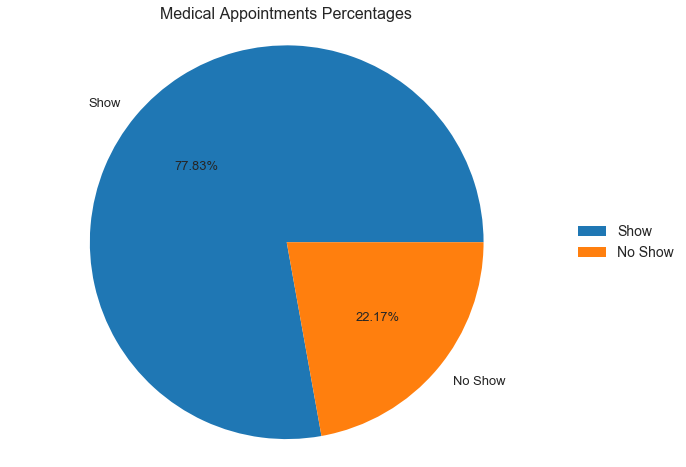

In [86]:
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize =a4_dims)
legend_label= ['Show', 'No Show']
data = df_medical_copy.no_show.value_counts()
arr_data = np.array(data)
ax.pie(data, autopct='%1.2f%%', labels= legend_label, textprops={'fontsize': 13})
ax.legend(legend_label, loc ="center left", fontsize = 14,  bbox_to_anchor =(1, 0, 0.5, 1))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Medical Appointments Percentages', fontsize = 16)
plt.show()


It is great to see that patients who show are greater than patients who do not show. However, a 22.17% for no show patients is worth taking a closer look into their variables or columns.

In [87]:
df_medical_noshow = df_medical_copy.query('no_show == True').copy()

In [88]:
df_medical_noshow.no_show.value_counts()

True    20807
Name: no_show, dtype: int64

#### How do the symptoms of no show people vary? [[9]](#ref_links9)

In [89]:
hypertension = df_medical_noshow.query('hypertension == True')['hypertension'].value_counts()
diabetes = df_medical_noshow.query('diabetes == True')['diabetes'].value_counts()
alcoholism = df_medical_noshow.query('alcoholism == True')['alcoholism'].value_counts()
handicap = df_medical_noshow.query('handicap == True')['handicap'].value_counts()
none_of_symptoms = 20808 - (hypertension + diabetes + alcoholism + handicap)
y = np.array([hypertension.values[0], diabetes.values[0], alcoholism.values[0], handicap.values[0], none_of_symptoms.values[0]])

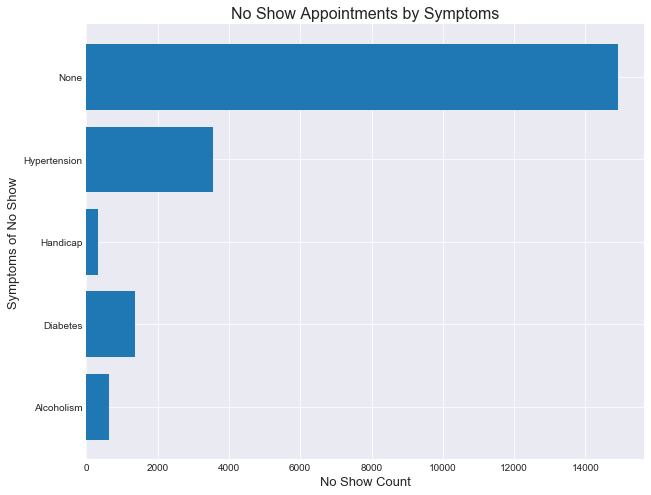

In [90]:
x= np.array(['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap','None'])
#-----
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize =a4_dims)
plt.xlabel('No Show Count', fontsize=13)
plt.ylabel('Symptoms of No Show', fontsize=13)
plt.title('No Show Appointments by Symptoms',  fontsize=16)
ax.barh(x, y);

Barchart shows that hypertension is the greatest of recorded cases. Diabetes comes next. We should not ignore though the handicap and alcoholism cases. Were these cases health condition revised from time to another? Were these cases asked if the timings they schedule are suitable with their health conditions. For handicap, who is the person in charge of appointment times? Finally, The None cases ; are they checked for their health conditions too from time to another?

#### How many of those who had symptoms recorded received an SMS?  [[10]](#ref_links10)

In [91]:
SMS_hypertension = df_medical_noshow.query('hypertension == True')['SMS_received'].value_counts()
SMS_diabetes = df_medical_noshow.query('diabetes == True')['SMS_received'].value_counts()
SMS_alcoholism = df_medical_noshow.query('alcoholism == True')['SMS_received'].value_counts()
SMS_handicap = df_medical_noshow.query('handicap == True')['SMS_received'].value_counts()

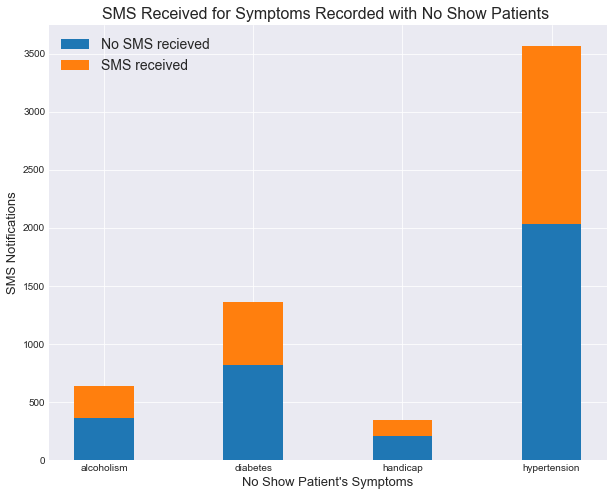

In [92]:
labels= np.array(['hypertension', 'diabetes', 'alcoholism', 'handicap'])
zero_arr = np.array([SMS_hypertension.values[0], SMS_diabetes.values[0], SMS_alcoholism.values[0], SMS_handicap.values[0]])
one_arr = np.array([SMS_hypertension.values[1], SMS_diabetes.values[1], SMS_alcoholism.values[1], SMS_handicap.values[1]])
width = 0.40
#-----
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize =a4_dims)
ax.bar(labels, zero_arr, width, label='No SMS recieved')
ax.bar(labels, one_arr, width, bottom=zero_arr,
       label='SMS received');
ax.legend(fontsize=14)
plt.xlabel('No Show Patient\'s Symptoms', fontsize=13)
plt.ylabel('SMS Notifications', fontsize=13)
plt.title('SMS Received for Symptoms Recorded with No Show Patients ',  fontsize=16)
#-----
plt.show()

Despite their special symptoms that should be taken with care in appointments, we see most of them are not sent SMS reminder. Also, the ones who have SMS sent are just sent one message. Have we contacted these patients when they missed their appointments? Why don't we send more than one message to these patients? And those who were missed, why didn't they receive a message?

#### How many of them do have a scholarship? [[8]](#ref_links8)

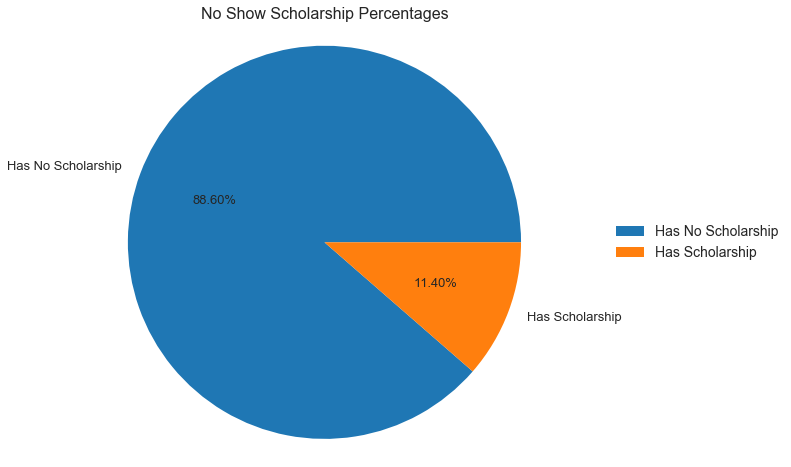

In [93]:
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize =a4_dims)
legend_label= ['Has No Scholarship', 'Has Scholarship']
data = df_medical_noshow.scholarship.value_counts()
arr_data = np.array(data)
ax.pie(data, autopct='%1.2f%%',labels= legend_label, textprops={'fontsize': 13})
ax.legend(legend_label, loc ="center left",  fontsize=14, bbox_to_anchor =(1, 0, 0.5, 1))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('No Show Scholarship Percentages',  fontsize=16)
plt.show()

A very little of them have a scholarship helping them get their medical treatment. Might the lack of scholarship be one of the reasons? Patients absolutely need to be contacted for this reason too, and suggestion to help them have scholarships or get them an alternative is greatly recommended.

#### How do frequency of patients showing up to their appointment vary with difference in days between scheduled and appointment date? [[11]](#ref_links11)

In [94]:
# get patients who showed up to their appointments
df_medical_show =  df_medical_copy.query('no_show == False').copy()

In [95]:
p_show = df_medical_show.groupby([df_medical_show['days_diff']]).no_show.count()

In [96]:
p_noshow = df_medical_noshow.groupby([df_medical_noshow['days_diff']]).no_show.count()

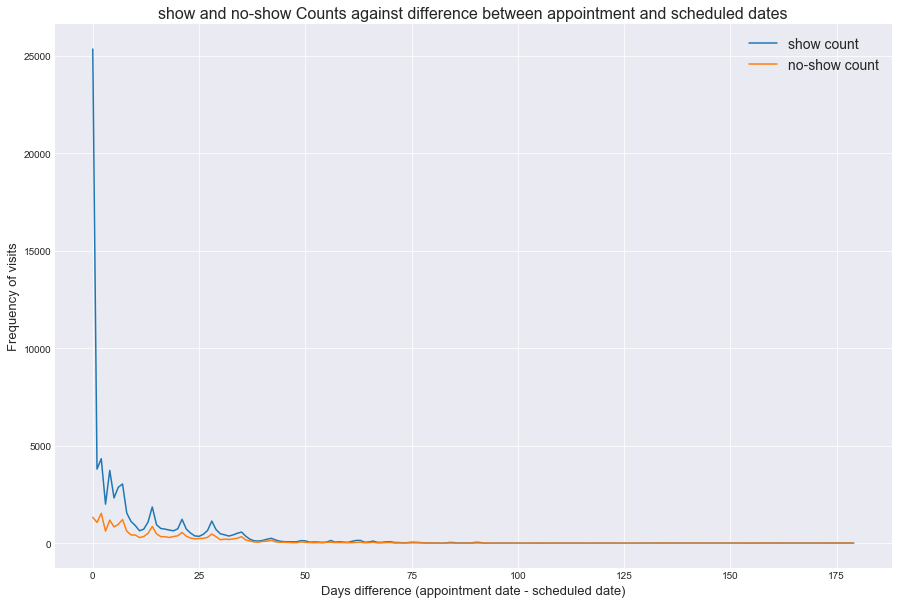

In [97]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(p_show)
plt.plot(p_noshow)
plt.legend(('show count', 'no-show count'), fontsize=14)
plt.xlabel('Days difference (appointment date - scheduled date)', fontsize=13)
plt.ylabel('Frequency of visits', fontsize=13);
plt.title('show and no-show Counts against difference between appointment and scheduled dates',  fontsize=16);

From the graph, it is clearly shown that as appointment day gets far away from scheduled day; patients are more vulnerable to miss their appointments. This case is not unexpected especially with symptoms recorded and lack of SMS received with no follow up procedures taken.

## Limitations:

#### Patient Id not loaded correctly: [[1]](#ref_links1)

Patient Ids vary in digit numbers. Some do have 7, others have 13. In this case, pandas masks the numbers, placing trailing invisible zeros to the left of number. And since the numbers do not have a fixed form, pandas loads the datatype with the most accurate datatype close to column precision. In this case it loaded column as float. If we checked ParserBase class, then navigate to <em> _infer_types </em> function, we will see that varying input size of patient id caused pandas to interpret id as float.

#### Appointment Id generation is incorrect: 

A new appointment Id is generated anytime a new row is inserted. So, if an SMS is received or a patient attends, dataset records a new row (according to csv file) with a new appointment id. The limitation here is the program should always maintain the same ID for any recorded appointment. 

#### Timestamp in scheduled and appointment dates: [[2]](#ref_links2)

Scheduled date has a timestamp indicating time of scheduling for an appointment, but appointment date has no timestamp. The limitations here is the missing of timestamp in appointment prevented us from doing further studies on what times of day patients too miss their appointments. This is especially important for those with symtomps such as alcoholic. Overcomming this limitation can help us assist the patient to schedule the most commited appointments.

#### Age column contains unrealistic data:

The ages in the dataset took unlogical path far away from the known and normal lifespan of a person. It would have been acceptable and expected to be very rare cases to have an age range of 90-98. But, the ages recorded exceeded 100, which caused a limitation of studying the varying ages missing their appointments and building any conclusion on it.  Another conjectured point of view is the patients were more than one in a single appointment such as those having handicap values of 2, 3, 4. Patients should be re-contacted for their correct ages.

#### Handicap variable or column has values -2, 3, 4- Although it is boolean:

Handicap is a boolean variable, which specifies whether the patient is malformed or not. It is a boolean variable, but we find values like 2, 3, 4. These variables specify count not a symptom. Based on the previous explanation. It is expected that the single appointment was to be divided into 2 or 3 appointment, or these numbers indicate a medical condition. 

#### More than one row recorded for the same appointment:

More than one patients scheduled more than one appointment. This is a normal case with no issues. The main issue is if we imagined we have a program which contains a form. The form gets filled everyday either with new appointments or with modification to existing appointments. New appointment is a new row, so no issue in this, but what about modifying an appointment. Whenever an update is added to an appointment, the program opens a new row for the patient with same details, and a different appointment id. Appointment issue is already discussed, but also the modication need to be modified on the same row to avoid duplication and losing data integrity. So, modification to appointments needs a revisit.

#### Other variables should be added to dataset:

The dataset needs extra columns to achieve the needed data structure mapped to its semantics. There are numerous ways to shape this dataset. I will try to give some of them. The suggested columns are:<br>
<strong>Medical speciality</strong>:this dataset is from which speciality whether internal medicine section, neurology section or any other or mixed dataset from different sections.<br>
<strong>Phone call</strong>: The patient should be contacted for an appointment with phone call too. The speech to speech contact ensures the patient really is reminded of his or her apointment. Phone call should be the priority followed by an SMS to called number.<br>
<strong>symptioms companion</strong>: patients with symptoms should also have a companion, who is too contacted for their appointments especially those handicap and alcoholic or in case or urgency. The companion name, phone number, relativity to patient and much more.
<strong>Other symptoms</strong>: In this world, we have numerous symptoms that prevents people from doing their daily activities not just show to their appointments. Patients need to be clearly contacted for if they have other symptoms.<br>
<strong> Incident occurred</strong>: Not only the symptoms , age , neighbourhood that prevent patients from their appointment, but also other incidents. A patient might had have a car accident for example while on his way to the hospital. A patient might have got a sudden illness and fever on the same appointment day. These are incidents and much more that might be taken into consideration.<br>

Of course doctor name, hospital name, patient history, and many more.

## Conclusion:

The dataset is incomplete and needs a lot of variables or columns to have a complete consistent structure. A lot of errors causing duplicate rows need to be fixed example: saving new row when SMS received. The current variables or columns need a comprehensive revision which involves contacting the patients for more information or detail. 

## References:

<a id = 'ref_links1'></a>
[1] Patient Id float datatype reason: <br>
https://github.com/pandas-dev/pandas/blob/v0.22.0/pandas/io/parsers.py <br>
https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python <br>
https://stackoverflow.com/questions/37796916/pandas-read-sql-integer-became-float <br>

<a id = 'ref_links2'></a>
[2] Convert to datetime: <br>
https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime <br>
https://stackoverflow.com/questions/45858155/removing-the-timestamp-from-a-datetime-in-pandas-dataframe <br>

<a id = 'ref_links3'></a>
[3] duplicated:<br>
https://www.geeksforgeeks.org/accessing-attributes-methods-python/ <br>
https://github.com/pandas-dev/pandas/blob/59b2db14f9c47a1b34da9efc12d708d43bcc893f/pandas/core/algorithms.py#L514 <br>
https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/ <br>

<a id = 'ref_links4'></a>
[4] Replace value:<br>
https://www.geeksforgeeks.org/replace-the-column-contains-the-values-yes-and-no-with-true-and-false-in-python-pandas/ <br>
https://stackoverflow.com/questions/43897296/pandas-converting-yes-no-to-true-false-failing <br>

<a id = 'ref_links5'></a>
[5] Add column days-diff: <br>
https://www.datasciencemadesimple.com/difference-two-dates-days-weeks-months-years-pandas-python-2/ <br>
https://www.geeksforgeeks.org/python-program-to-find-number-of-days-between-two-given-dates/ <br>


<a id = 'ref_links6'></a>
[6] Drop columns < 0 <br>
https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/ <br>

<a id = 'ref_links7'></a>
[7] Reorder columns: <br>
https://erikrood.com/Python_References/change_order_dataframe_columns_final.html

<a id = 'ref_links8'></a>
[8] Pie chart:<br>
https://stackabuse.com/matplotlib-pie-chart-tutorial-and-examples/ <br>
https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/ <br>
https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm <br>
https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python <br>

<a id = 'ref_links9'></a>
[9] barh:<br>
https://www.geeksforgeeks.org/matplotlib-pyplot-barh-function-in-python/ <br>
https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py <br>

<a id = 'ref_links10'></a>
[10] Stacked bar: <br>
https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

<a id = 'ref_links11'></a>
[11] matplotlib lineplot and Seaborn lineplot(from 0.11 + new version packages only) <br>
https://stackabuse.com/matplotlib-line-plot-tutorial-and-examples/ <br>
https://stackabuse.com/add-a-legend-to-figure-in-matplotlib/<br>
https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/#:~:text=A%20legend%20is%20an%20area,best%E2%80%9D%20(upper%20left).<br>
https://dfrieds.com/data-analysis/create-year-month-column.html <br>
https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.sort_values.html <br>
https://www.geeksforgeeks.org/seaborn-lineplot-method-in-python/ <br>
https://www.geeksforgeeks.org/lineplot-using-seaborn-in-python/ <br>
https://stackoverflow.com/questions/52308749/how-do-i-create-a-multiline-plot-using-seaborn <br>

[12] Font size in graphs:<br>
https://www.geeksforgeeks.org/how-to-change-legend-font-size-in-matplotlib/ <br>
https://stackabuse.com/change-font-size-in-matplotlib/ <br>

[13] Graph and title renaming:<br>
https://www.anychart.com/blog/2017/04/05/chart-captions-title-graph-tips/